In [1]:
import MDAnalysis as mda
import MDAnalysis.coordinates.DCD
import MDAnalysis.coordinates.DCD as dcd
import numpy as np
import pandas as pd

In [2]:
topology='ala13_mini_conv.pdb'
trajectory='ala13_md.dcd'
universe=mda.Universe(topology,trajectory)

In [5]:
import MDAnalysis.analysis.rms
import matplotlib.pyplot as plt

In [4]:
R = MDAnalysis.analysis.rms.RMSD(universe,
                                 select='not name H*')
R.run()

In [10]:
rmsd[2][::5][4]

3.106895322421311

### Method OneclassSVM

#### The gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’.

#### kernel : string, optional (default=’rbf’)
#### Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used. If a callable is given it is used to precompute the kernel matrix.

nu=0.01, kernel="rbf", gamma=0.0001

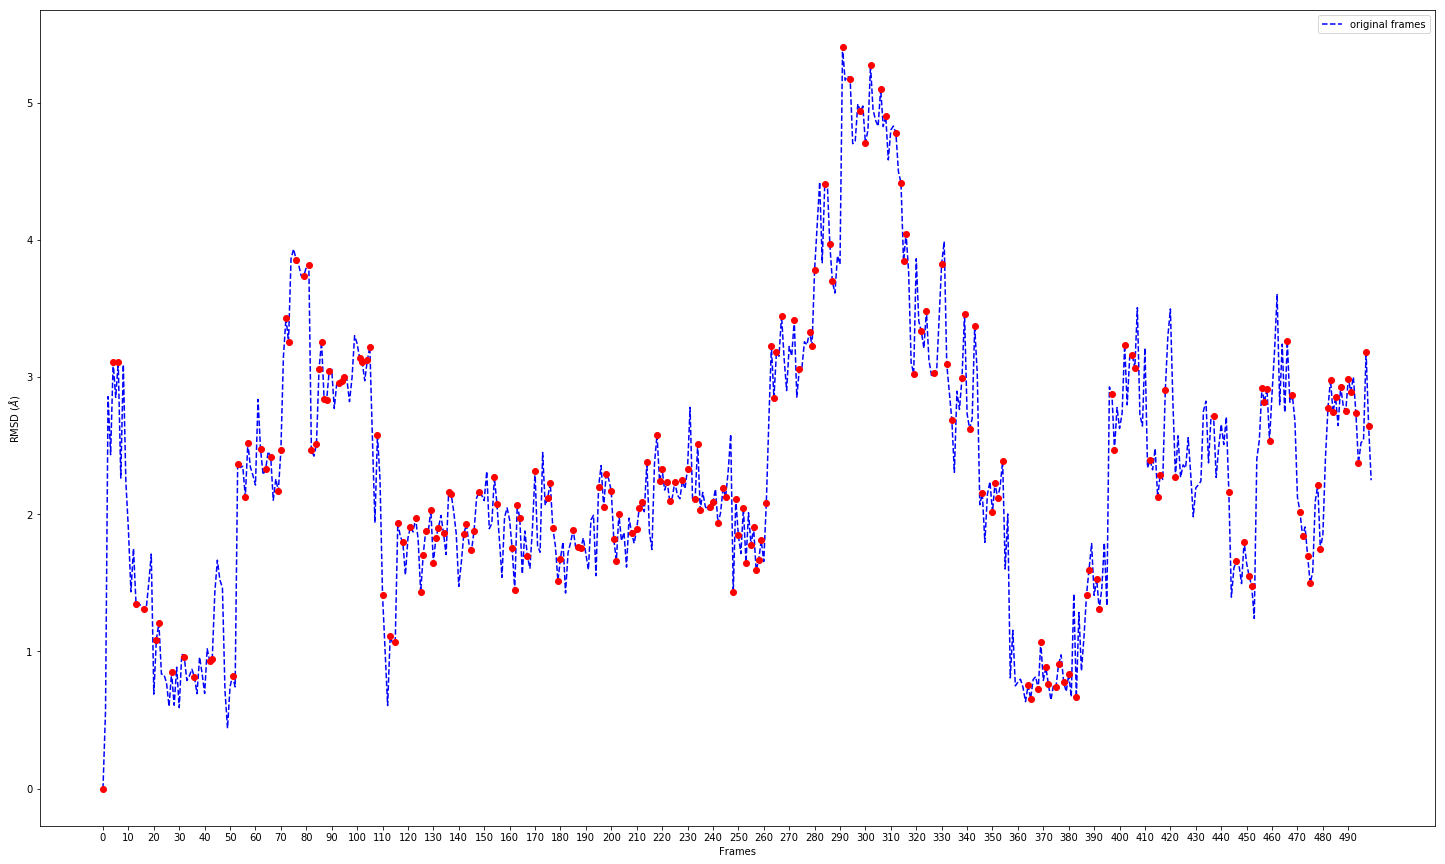

In [34]:
rmsd = R.rmsd.T   # transpose makes it easier for plotting
time=rmsd[1][::5]
frames=np.arange(len(time))
negative_samples=[25, 29, 39, 49, 125, 129, 139, 149, 225, 229, 239, 249, 325, 329, 339, 349, 425, 429, 439, 449]
nege=[0, 4, 6, 13, 16, 21, 22, 27, 32, 36, 42, 43, 51, 53, 56, 57, 62, 64, 66, 69, 70, 72, 73, 76, 79, 81, 82, 84, 85, 86, 87, 88, 89, 93, 94, 95, 101, 102, 104, 105, 108, 110, 113, 115, 116, 118, 121, 123, 125, 126, 127, 129, 130, 131, 132, 134, 136, 137, 142, 143, 145, 146, 148, 154, 155, 161, 162, 163, 164, 167, 170, 175, 176, 177, 179, 180, 185, 187, 188, 195, 197, 198, 200, 201, 202, 203, 208, 210, 211, 212, 214, 218, 219, 220, 222, 223, 225, 228, 230, 233, 234, 235, 239, 240, 242, 244, 245, 248, 249, 250, 252, 253, 255, 256, 257, 258, 259, 261, 263, 264, 265, 267, 272, 274, 278, 279, 280, 284, 286, 287, 291, 294, 298, 300, 302, 306, 308, 312, 314, 315, 316, 319, 322, 324, 327, 330, 332, 334, 338, 339, 341, 343, 346, 350, 351, 352, 354, 364, 365, 368, 369, 371, 372, 375, 376, 378, 380, 383, 387, 388, 391, 392, 397, 398, 402, 405, 406, 412, 415, 416, 418, 422, 437, 443, 446, 449, 451, 452, 456, 457, 458, 459, 466, 468, 471, 472, 474, 475, 478, 479, 482, 483, 484, 485, 487, 489, 490, 491, 493, 494, 497, 498]
#threshold=0.825
plt.figure(figsize=(25,15))
#ax = fig.add_subplot(111)
plt.plot(frames, rmsd[2][::5], 'b--',  label="original frames")
#ax.hlines(y=threshold,xmin=0,xmax=rmsd[1][-1],linewidth=1, color='r',label="threshold")
for i in nege:
    plt.plot(i,rmsd[2][::5][i],'o',c='red')
plt.legend(loc="best")
plt.xlabel("Frames")
plt.ylabel(r"RMSD ($\AA$)")
#fig.savefig("rmsd.jpg")
my_x_ticks = np.arange(0, 500, 10)
#my_y_ticks = np.arange(-2, 2, 0.3)
plt.xticks(my_x_ticks)
#ax.yticks(my_y_ticks)
plt.show()

neg=[14, 25, 77, 138, 176, 254, 320, 336, 353, 400, 430, 431, 439, 473]
plt.figure(figsize=(25,15))
#ax = fig.add_subplot(111)
plt.plot(frames, rmsd[2][::5], 'b--',  label="original frames")
#ax.hlines(y=threshold,xmin=0,xmax=rmsd[1][-1],linewidth=1, color='r',label="threshold")
for i in neg:
    plt.plot(i,rmsd[2][::5][i],'o',c='red')
plt.legend(loc="best")
plt.xlabel("Frames")
plt.ylabel(r"RMSD ($\AA$)")
#fig.savefig("rmsd.jpg")
my_x_ticks = np.arange(0, 500, 10)
#my_y_ticks = np.arange(-2, 2, 0.3)
plt.xticks(my_x_ticks)
#ax.yticks(my_y_ticks)
plt.show()

###  IsolationForests
#### reg2: behaviour='new', max_samples=100,random_state=rng, contamination='auto'
#### reg3: behaviour='new', max_samples=200,random_state=rng, contamination='auto'

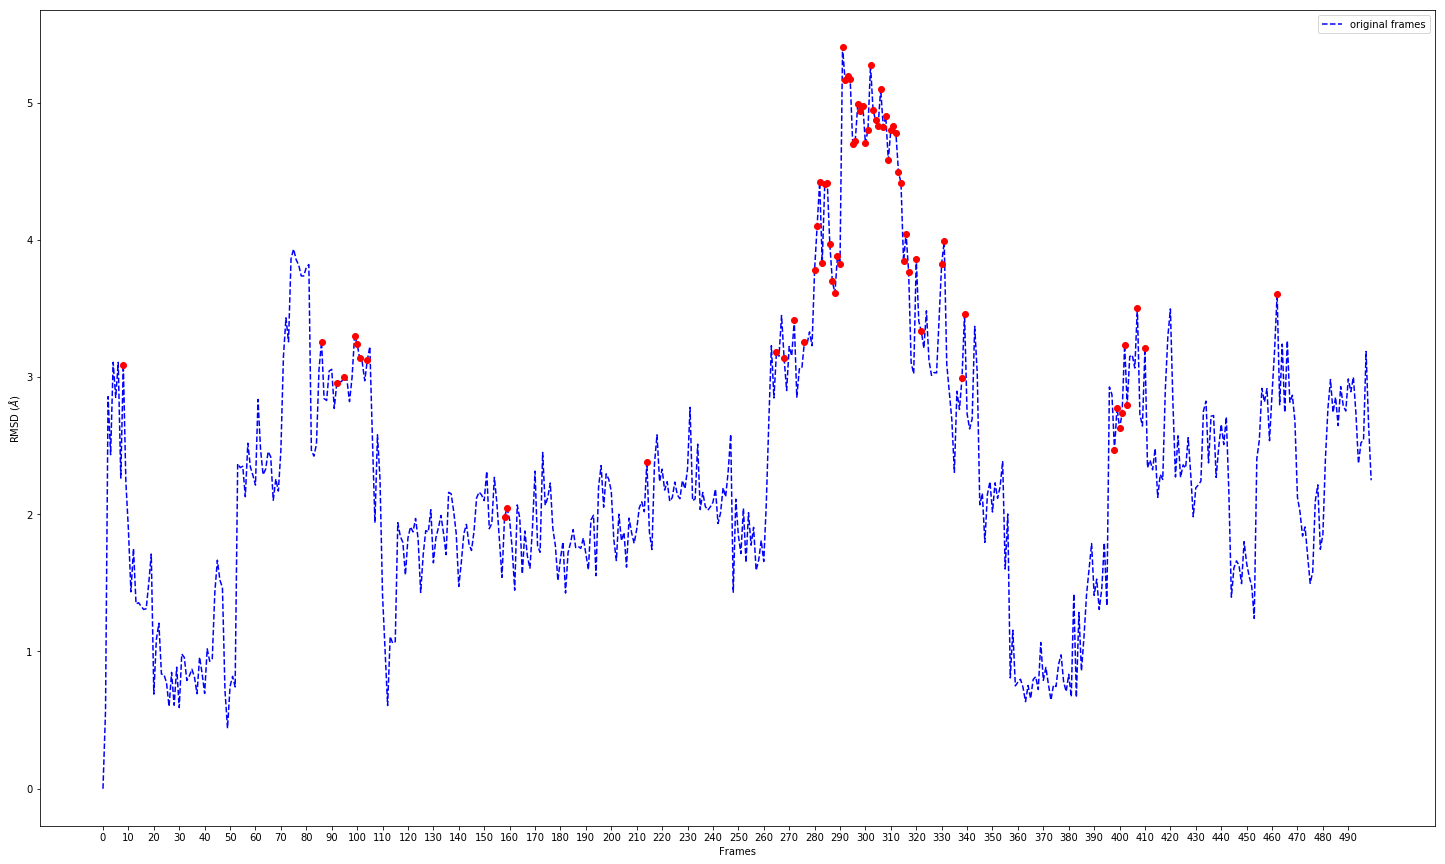

In [28]:
neg1=[86, 92, 93, 98, 99, 100, 101, 104, 214, 265, 267, 268, 270, 272, 275, 276, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 320, 321, 322, 327, 328, 329, 330, 331, 338, 339, 398, 399, 400, 401, 402, 403, 407, 410, 462]
neg2=[8, 86, 92, 95, 99, 100, 101, 104, 158, 159, 214, 265, 268, 272, 276, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 320, 322, 330, 331, 338, 339, 398, 399, 400, 401, 402, 403, 407, 410, 462]
plt.figure(figsize=(25,15))
#ax = fig.add_subplot(111)
plt.plot(frames, rmsd[2][::5], 'b--',  label="original frames")
#ax.hlines(y=threshold,xmin=0,xmax=rmsd[1][-1],linewidth=1, color='r',label="threshold")
for i in neg2:
    plt.plot(i,rmsd[2][::5][i],'o',c='red')
plt.legend(loc="best")
plt.xlabel("Frames")
plt.ylabel(r"RMSD ($\AA$)")
#fig.savefig("rmsd.jpg")
my_x_ticks = np.arange(0, 500, 10)
#my_y_ticks = np.arange(-2, 2, 0.3)
plt.xticks(my_x_ticks)
#ax.yticks(my_y_ticks)
plt.show()

### Multiple plots in one graphs
#### reg3: behaviour='new', max_samples=10,random_state=rng, contamination='auto'
#### reg4: behaviour='new', max_samples=500,random_state=rng, contamination='auto'

Text(0, 0.5, 'RMSD ($\\AA$)')

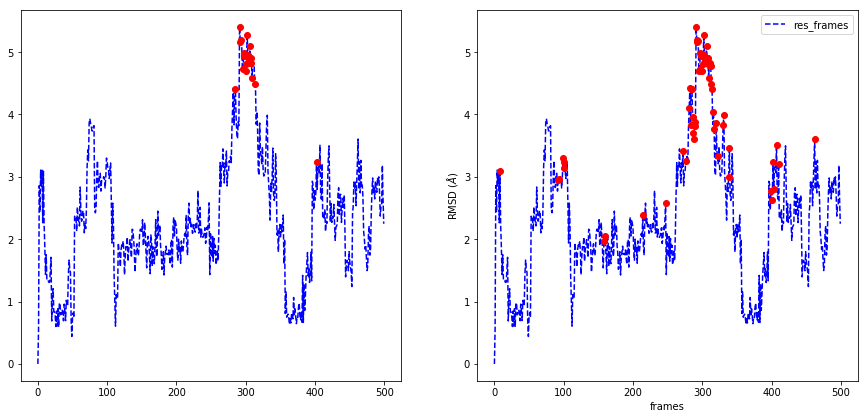

In [32]:
neg3=[284, 291, 292, 293, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 313, 402]
neg4=[8, 92, 93, 99, 100, 101, 158, 159, 214, 247, 272, 276, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 316, 317, 320, 322, 330, 331, 338, 339, 399, 400, 402, 403, 407, 410, 462]
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(221)
ax.plot(frames, rmsd[2][::5], 'b--',  label="res_frames")
for i in neg3:
    plt.plot(i,rmsd[2][::5][i],'o',c='red')
ax = fig.add_subplot(222)
ax.plot(frames, rmsd[2][::5], 'b--',  label="res_frames")
for i in neg4:
    plt.plot(i,rmsd[2][::5][i],'o',c='red')
#ax = fig.add_subplot(223)
#ax = fig.add_subplot(224)

#ax.hlines(y=threshold,xmin=0,xmax=rmsd[1][-1],linewidth=1, color='r',label="threshold")
ax.legend(loc="best")
ax.set_xlabel("frames")
ax.set_ylabel(r"RMSD ($\AA$)")